In [9]:
# Create your views here.
from django.http import HttpResponse, Http404, HttpResponseRedirect

from django.shortcuts import render

# from django.urls import reverse # future versions.
from django.core.urlresolvers import reverse_lazy


from os.path import join
from django.conf import settings

import numpy as np, pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd, folium
from geopy import Nominatim

import seaborn as sns
sns.set(font_scale = 1.7)

from io import BytesIO

%matplotlib inline

In [10]:
df = pd.read_csv("merge_summary.csv", index_col = "Year", parse_dates = ["Year"])

In [11]:
df

,No.,State,DISTRICT_ID,Name of reporting district,"All Students, Math, All Grades,Number of Students","All Students, Math, All Grades,% Performance","MAM Math, All Grades,Number of Students","MAM Math, All Grades,% Performance","MAS Math, All Grades,Number of Students","MAS Math, All Grades,% Performance",...,"MIG Reading, Grade 7, % Performance","MIG Reading, Grade 8, Number of Students","MIG Reading, Grade 8, % Performance","MIG Reading, HSNumber of Students","MIG Reading, HS% Performance",Total students,Total revenues,Current expenditures,Current expenditures per pupil,Total expenditures per pupil
Year,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0,Alaska,200180,Anchorage school district,28943,70,2464,54.0,4002,63.0,...,70.0,136.0,65.0,250.0,70.0,48857,650738,611450,12515.095070,14192.7460
2008-01-01,1,Arizona,404970,Mesa unified school district,36171,77,1536,60.0,934,86.0,...,NaN,10.0,NaN,11.0,NaN,73044,635243,542481,7426.770166,8257.2970
2008-01-01,2,Arizona,408800,Tucson unified school district,29411,62,1338,49.0,790,76.0,...,NaN,0.0,NaN,0.0,NaN,59327,545561,471360,7945.117737,9650.8672
2008-01-01,3,California,607440,Capistrano unified school district,28531,69,151,60.0,2424,85.0,...,NaN,8.0,NaN,11.0,NaN,52390,453589,417759,7974.021760,8574.8044
2008-01-01,4,California,612330,Elk grove unified school district,33311,58,263,40.0,9724,70.0,...,NaN,7.0,NaN,3.0,NaN,62294,596705,532880,8554.274890,9532.0416
2008-01-01,5,California,614550,Fresno unified school district,39356,44,300,35.0,5544,54.0,...,21.0,458.0,17.0,331.0,18.0,76460,838633,768663,10053.138900,11333.9920
2008-01-01,6,California,614880,Garden grove unified school district,26538,60,53,50.0,8726,82.0,...,NaN,NaN,NaN,NaN,NaN,48669,468369,456637,9382.502209,9657.1534
2008-01-01,7,California,622500,Long beach unified school district,46647,54,120,50.0,6284,70.0,...,30.0,39.0,20.0,34.0,30.0,88186,914366,850615,9645.692060,10454.5170
2008-01-01,8,California,622710,Los angeles unified school district,360812,44,1160,46.0,23593,75.0,...,35.0,192.0,35.0,87.0,30.0,693680,9551053,7878168,11357.063780,14767.7690


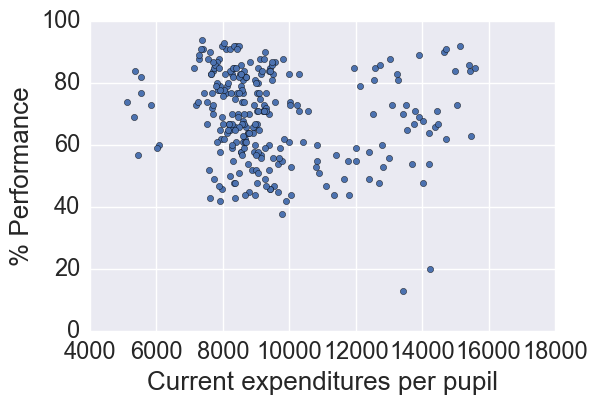

In [15]:
ax = df[["Current expenditures per pupil", "All Students, Math, All Grades,% Performance"]]
ax = ax.plot(kind = 'scatter', x = "Current expenditures per pupil", y = "All Students, Math, All Grades,% Performance", legend=False, ylim = (0,100))
ax.set_ylabel("% Performance")
ax.set_xlabel("Current expenditures per pupil ($)")
plt.title('Expenditure vs Performance (Math)', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
ax = df.plot(kind = "scatter", x = "Current expenditures per pupil", y = "All Students, Math, All Grades,% Performance", legend=False, ylim = [0,100])
ax = ax.set_ylabel("% Performance")
ax